In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import problema1.src.preprocessing as prepro
import problema1.src.data_handler as data_handler
import problema1.src.utils as utils
import problema1.src.models as models
from problema1.src.models import LogisticRegression
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

cell_diagnosis_dev : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_dev_imbalanced : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_test : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_test.csv')
cell_diagnosis_test_imbalanced : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_test_imbalanced.csv')

# 1 )

## 1.1 )

In [2]:
cell_diagnosis_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1333 non-null   float64
 1   CellShape            1347 non-null   float64
 2   NucleusDensity       1362 non-null   float64
 3   ChromatinTexture     1366 non-null   float64
 4   CytoplasmSize        1347 non-null   float64
 5   CellAdhesion         1369 non-null   float64
 6   MitosisRate          1343 non-null   float64
 7   NuclearMembrane      1343 non-null   float64
 8   GrowthFactor         1359 non-null   float64
 9   OxygenSaturation     1375 non-null   float64
 10  Vascularization      1347 non-null   float64
 11  InflammationMarkers  1358 non-null   float64
 12  Diagnosis            1663 non-null   float64
 13  CellType             1407 non-null   object 
 14  GeneticMutation      1663 non-null   object 
dtypes: float64(13), object(2)
memory usage

In [3]:
print(cell_diagnosis_dev['GeneticMutation'].value_counts()['Presnt'] + cell_diagnosis_dev['GeneticMutation'].value_counts()['Absnt'])
### En la feature GeneticMutation:
###     #Ocurrencias de 'Presnt' + #Ocurrencias de 'Absnt'
###     OUTPUT = 1663
### El output es igual al número de muestras, por lo tanto no hay valores desconocidos para la feature 'GeneticMutation'

1663


In [4]:
cell_diagnosis_dev_processed = prepro.correct_data_types(cell_diagnosis_dev)
cell_diagnosis_dev_processed = prepro.fill_na_values(cell_diagnosis_dev_processed)
cell_diagnosis_dev_processed = prepro.one_hot_encoding(cell_diagnosis_dev_processed, 'CellType')
cell_diagnosis_dev_processed.to_csv(f'{project_root}/TP02/problema1/data/processed/cell_diagnosis_dev_processed.csv', index=False)
cell_diagnosis_dev_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1663 non-null   Float64
 1   CellShape            1663 non-null   Float64
 2   NucleusDensity       1663 non-null   Float64
 3   ChromatinTexture     1663 non-null   Float64
 4   CytoplasmSize        1663 non-null   Float64
 5   CellAdhesion         1663 non-null   Float64
 6   MitosisRate          1663 non-null   Float64
 7   NuclearMembrane      1663 non-null   Float64
 8   GrowthFactor         1663 non-null   Float64
 9   OxygenSaturation     1663 non-null   Float64
 10  Vascularization      1663 non-null   Float64
 11  InflammationMarkers  1663 non-null   Float64
 12  Diagnosis            1663 non-null   bool   
 13  GeneticMutation      1663 non-null   bool   
 14  CellType_Epthlial    1663 non-null   bool   
 15  CellType_Mesnchymal  1663 non-null   b

In [5]:
display(cell_diagnosis_dev_processed.head())
print("")
display(cell_diagnosis_dev_processed.describe())
display(cell_diagnosis_dev_processed.describe(include=["bool"]))

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
0,63.423148,0.500594,1.473261,23.300222,28.448318,0.477657,3.434832,2.492852,60.993969,78.625935,5.727217,41.158399,False,False,True,False,False
1,72.906362,0.474808,1.36136,21.336137,29.856233,0.481035,2.702433,2.281137,63.084699,79.987328,5.319552,40.859154,True,True,True,False,False
2,70.711969,0.481701,1.445035,21.521406,30.582427,0.472651,2.786606,2.318029,61.347022,79.987328,5.068099,40.859154,True,False,False,False,True
3,73.210206,0.498832,1.427612,22.437077,29.88797,0.439511,2.99838,2.149232,64.047169,80.693058,5.068099,37.843069,True,True,False,True,False
4,68.348288,0.498832,1.454116,21.150723,28.328197,0.474836,2.987601,2.414464,62.197197,81.73799,4.347438,43.444881,True,True,True,False,False


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,82.360121,0.584458,2.034496,25.375571,32.936831,0.473358,4.950468,2.397981,72.638486,91.777082,5.056086,40.641947
std,88.177152,0.50334,4.488109,22.566185,29.606227,0.040661,10.335483,0.218241,69.80439,74.594478,0.554318,4.533329
min,2.735933,0.063622,0.097131,10.0,5.0,0.0,0.0,1.0,0.0,70.0,0.082936,0.0
25%,67.527979,0.485429,1.4094,21.481689,26.826557,0.462142,2.82882,2.290993,58.944305,79.389011,4.860817,38.148935
50%,69.704323,0.498832,1.445035,22.06681,28.448318,0.474836,3.080247,2.414464,60.993969,79.987328,5.068099,40.859154
75%,71.846171,0.516412,1.476913,22.630336,30.090473,0.487328,3.365578,2.490968,62.515962,80.748008,5.243356,42.845185
max,1000.0,5.048566,50.0,263.793425,299.350559,1.0,100.0,5.0,563.622684,807.181058,10.0,82.21663


,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
count,1663,1663,1663,1663,1663
unique,2,2,2,2,2
top,False,True,False,False,False
freq,914,848,1172,1230,924


In [6]:
cell_diagnosis_dev_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(cell_diagnosis_dev_processed)
cell_diagnosis_dev_processed_and_standardized.to_csv(f'{project_root}/TP02/problema1/data/processed/cell_diagnosis_dev_processed_and_standardized.csv', index=False)
display(cell_diagnosis_dev_processed_and_standardized.head())
print("")
display(cell_diagnosis_dev_processed_and_standardized.describe())

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
0,-0.214761,-0.166614,-0.125049,-0.091967,-0.151607,0.105726,-0.146644,0.434707,-0.166816,-0.176302,1.210733,0.113923,False,False,True,False,False
1,-0.107213,-0.217845,-0.149982,-0.179004,-0.104052,0.188807,-0.217507,-0.535389,-0.136865,-0.158051,0.475297,0.047913,True,True,True,False,False
2,-0.132099,-0.204151,-0.131338,-0.170794,-0.079524,-0.017399,-0.209363,-0.366348,-0.161759,-0.158051,0.02167,0.047913,True,False,False,False,True
3,-0.103767,-0.170116,-0.13522,-0.130217,-0.10298,-0.832414,-0.188873,-1.139791,-0.123077,-0.14859,0.02167,-0.6174,True,True,False,True,False
4,-0.158905,-0.170116,-0.129315,-0.18722,-0.155664,0.036339,-0.189915,0.075527,-0.149579,-0.134582,-1.278416,0.618295,True,True,True,False,False


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.903002,-1.034759,-0.431666,-0.681354,-0.943613,-11.641627,-0.478978,-6.405684,-1.040601,-0.29194,-8.971664,-8.965144
25%,-0.168208,-0.196744,-0.139278,-0.172554,-0.206385,-0.275849,-0.205278,-0.49023,-0.196179,-0.166072,-0.35227,-0.54993
50%,-0.143527,-0.170116,-0.131338,-0.146625,-0.151607,0.036339,-0.180951,0.075527,-0.166816,-0.158051,0.02167,0.047913
75%,-0.119237,-0.135188,-0.124236,-0.121653,-0.096141,0.343572,-0.153345,0.426075,-0.145013,-0.147854,0.337839,0.486009
max,10.406776,8.868974,10.687241,10.565271,8.998571,12.952077,9.196429,11.922703,7.033715,9.590576,8.918919,9.170895


## 1.2 )

In [7]:
train : pd.DataFrame
validation : pd.DataFrame
train, validation = data_handler.get_train_and_validation_sets(cell_diagnosis_dev_processed_and_standardized, train_fraction=0.8, seed=42)

print("Cantidad de muestras del set de entrenamiento: ", train.shape[0])
print("Cantidad de muestras del set de validación:    ", validation.shape[0])

Cantidad de muestras del set de entrenamiento:  1330
Cantidad de muestras del set de validación:     333


In [8]:
log_reg : LogisticRegression = LogisticRegression(train.drop(columns=['Diagnosis']).to_numpy(), train['Diagnosis'].to_numpy(), L2 = 0)
log_reg.fit_gradient_descent(step_size=0.001, tolerance=0.001)

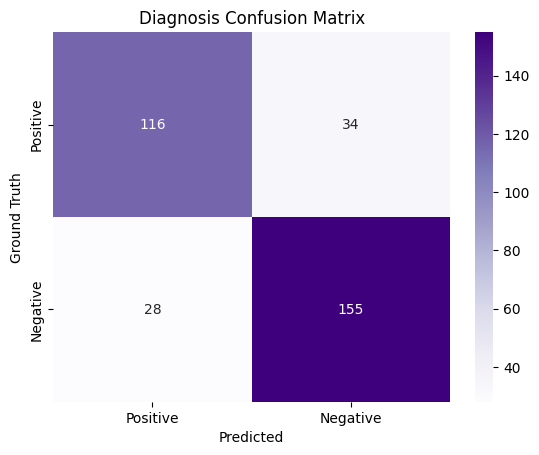

ACCURACY             :  0.8138138138138138
PRECISION            :  0.8055555555555556
RECALL               :  0.7733333333333333
FALSE POSITIVE RATE  :  0.15300546448087432
F-SCORE              :  0.7891156462585034


In [9]:
log_reg.predict(validation.drop(columns=['Diagnosis']).to_numpy())
log_reg.evaluate(validation['Diagnosis'].to_numpy())
log_reg.plot_confusion_matrix()
log_reg.print_metrics()

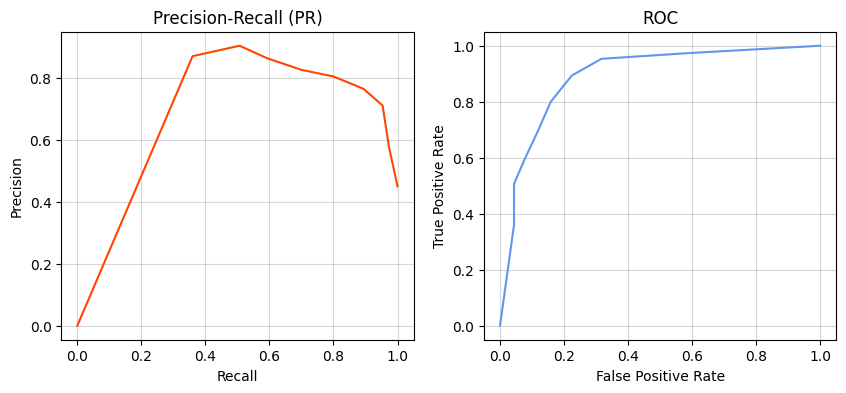

AUC-PR  :  0.5375235097560287
AUC-ROC :  0.8918579234972678


In [10]:
recalls, precisions = log_reg.get_roc_points(validation['Diagnosis'].to_numpy(), k_points=10)
falses_positives_rateses, trues_positives_rateses = log_reg.get_pr_points(validation['Diagnosis'].to_numpy(), k_points=10)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Precision-Recall (PR)")
plt.plot(recalls, precisions, color='orangered')
plt.grid(visible=True, alpha=0.5)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.subplot(1, 2, 2)
plt.title("ROC")
plt.plot(falses_positives_rateses, recalls, color='cornflowerblue')
plt.grid(visible=True, alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("AUC-PR  : ", utils.get_area_under_curve(recalls, precisions))
print("AUC-ROC : ", utils.get_area_under_curve(falses_positives_rateses, recalls))

In [11]:
Ls : np.ndarray = np.arange(0, 20, 0.25)
def cross_validation_regularization_by_f_score(df : pd.DataFrame, Ls : np.ndarray, k_folds : int = 5) -> dict[str, float]:
    F_models : dict[str, float] = {f'gradient_L2_{l}' : [] for l in Ls}
    entries_per_fold : int = int(np.floor(df.shape[0] / k_folds))
    for i in range(1, k_folds + 1):
        train : pd.DataFrame = df.drop(df.index[(i*entries_per_fold) - entries_per_fold : (i*entries_per_fold)])
        validation : pd.DataFrame = df.iloc[(i*entries_per_fold) - entries_per_fold : (i*entries_per_fold)]
        validation_processed = prepro.correct_data_types(validation)
        validation_processed = prepro.fill_na_values(validation_processed) 
        validation_processed = prepro.one_hot_encoding(validation_processed, 'CellType')
        train_processed = prepro.correct_data_types(train)
        train_processed = prepro.fill_na_values(train_processed) 
        train_processed = prepro.one_hot_encoding(train_processed, 'CellType')
        numeric_columns : pd.Index = validation_processed.select_dtypes(include=np.number).columns
        validation_processed_and_standardized : pd.DataFrame = validation_processed
        validation_processed_and_standardized[numeric_columns] = (validation_processed[numeric_columns] - train_processed[numeric_columns].mean()) / train_processed[numeric_columns].std()
        train_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(train_processed)
        # print(len(train_processed_and_standardized) + len(validation_processed_and_standardized))
        for l in Ls:
            lin_grad_L2 : LogisticRegression = LogisticRegression(train_processed_and_standardized.drop(columns='Diagnosis').to_numpy(), train_processed_and_standardized['Diagnosis'].to_numpy(), L2=l)
            lin_grad_L2.fit_gradient_descent(step_size=0.001, tolerance=0.001)
            lin_grad_L2.predict(validation_processed_and_standardized.drop(columns=['Diagnosis']).to_numpy())
            lin_grad_L2.evaluate(validation_processed_and_standardized['Diagnosis'].to_numpy())
            F_models[f'gradient_L2_{l}'].append(
                lin_grad_L2.get_f_score()
            )
    return F_models
F_models : dict[str, float] = cross_validation_regularization_by_f_score(cell_diagnosis_dev, Ls, k_folds=5)
print(F_models)

{'gradient_L2_0.0': [0.7734375, 0.792156862745098, 0.8291139240506329, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_0.25': [0.7734375, 0.792156862745098, 0.8291139240506329, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_0.5': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_0.75': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_1.0': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8580060422960725], 'gradient_L2_1.25': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8614457831325302], 'gradient_L2_1.5': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8640483383685801], 'gradient_L2_1.75': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8640483383685801], 'gradient_L2_2.0': [0.7734375, 0.796875, 0.832807570977918, 0.8209876543209876, 0.8640483383685801], 'gradient_L2_2.25': [0.7734375, 0.796875, 0.832807570977918, 0.820

In [12]:
print("MODEL              F-SCORE MEAN")
F_means : pd.Series = pd.DataFrame(F_models).mean()
print(F_means)

MODEL              F-SCORE MEAN
gradient_L2_0.0      0.814740
gradient_L2_0.25     0.814740
gradient_L2_0.5      0.816423
gradient_L2_0.75     0.816423
gradient_L2_1.0      0.816423
                       ...   
gradient_L2_18.75    0.818637
gradient_L2_19.0     0.819265
gradient_L2_19.25    0.819265
gradient_L2_19.5     0.819265
gradient_L2_19.75    0.819265
Length: 80, dtype: float64


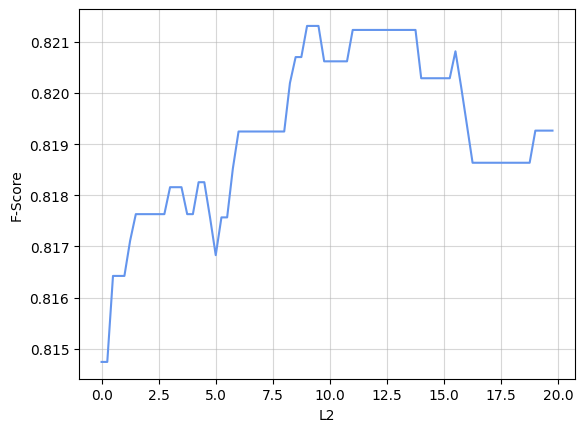

L2 que maximiza F-Score:  9.0


In [13]:
plt.plot(Ls, pd.DataFrame(F_models).mean(), color='cornflowerblue')
plt.grid(visible=True, alpha=0.5)
plt.xlabel('L2')
plt.ylabel('F-Score')
plt.show()
print("L2 que maximiza F-Score: ", Ls[np.argmax(F_means)])

## 1.3 )

In [14]:
cell_diagnosis_test_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    cell_diagnosis_test, 
    filename='cell_diagnosis_test', 
    save_path=f'{project_root}/TP02/problema1/data/processed/'
)
cell_diagnosis_test_processed_and_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             185 non-null    Float64
 1   CellShape            185 non-null    Float64
 2   NucleusDensity       185 non-null    Float64
 3   ChromatinTexture     185 non-null    Float64
 4   CytoplasmSize        185 non-null    Float64
 5   CellAdhesion         185 non-null    Float64
 6   MitosisRate          185 non-null    Float64
 7   NuclearMembrane      185 non-null    Float64
 8   GrowthFactor         185 non-null    Float64
 9   OxygenSaturation     185 non-null    Float64
 10  Vascularization      185 non-null    Float64
 11  InflammationMarkers  185 non-null    Float64
 12  Diagnosis            185 non-null    bool   
 13  GeneticMutation      185 non-null    bool   
 14  CellType_Epthlial    185 non-null    bool   
 15  CellType_Mesnchymal  185 non-null    boo

ACCURACY             :  0.8594594594594595
PRECISION            :  0.88
RECALL               :  0.7951807228915663
FALSE POSITIVE RATE  :  0.08823529411764706
F-SCORE              :  0.8354430379746836


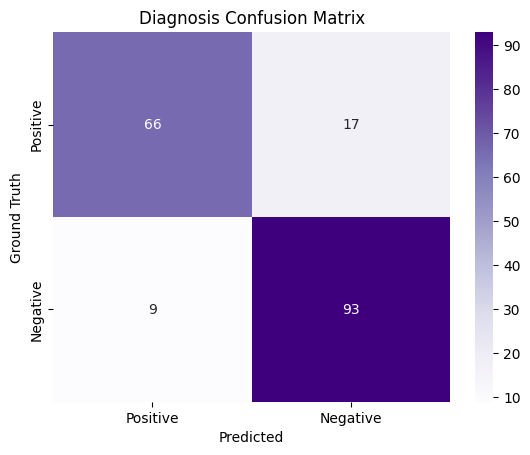

In [15]:
# Utilizo log_reg, modelo definido en el punto 1.2) con los siguientes parámetros:
# step_size = 0.001, tolerance = 0.001, L2_regularization = 9, threshold = 0.5
train_L2_9 : pd.DataFrame
validation_L2_9 : pd.DataFrame
train_L2_9, validation_L2_9 = data_handler.get_train_and_validation_sets(cell_diagnosis_dev_processed_and_standardized, train_fraction=0.8, seed=42)
log_reg_L2_9 = LogisticRegression(train.drop(columns=['Diagnosis']).to_numpy(), train['Diagnosis'].to_numpy(), L2 = 9)
log_reg_L2_9.fit_gradient_descent(step_size=0.001, tolerance=0.001)
log_reg_L2_9.predict(cell_diagnosis_test_processed_and_standardized.drop(columns=['Diagnosis']).to_numpy())
log_reg_L2_9.evaluate(cell_diagnosis_test_processed_and_standardized['Diagnosis'].to_numpy(), threshold = 0.5)
log_reg_L2_9.print_metrics()
log_reg_L2_9.plot_confusion_matrix()

## 1.4 )

In [16]:
# Utilizo modelo con los regularización L2 = 9
# step_size = 0.001, tolerance = 0.001, L2_regularization = 9, threshold = 0.5

In [17]:
def evaluate_model_1_4(df : pd.DataFrame, metricas : pd.DataFrame, method_name : str = "") -> pd.DataFrame:
    train_1_4 : pd.DataFrame
    validation_1_4 : pd.DataFrame
    _df : pd.DataFrame = df.copy()
    train_1_4, validation_1_4 = data_handler.get_train_and_validation_sets(_df, train_fraction=0.8, seed=42)
    log_reg_1_4 : LogisticRegression = LogisticRegression(train_1_4.drop(columns=['Diagnosis']).to_numpy(), train_1_4['Diagnosis'].to_numpy(), L2 = 9)
    log_reg_1_4.fit_gradient_descent(step_size=0.001, tolerance=0.001, max_number_of_steps=100000)
    log_reg_1_4.predict(validation_1_4.drop(columns=['Diagnosis']).to_numpy())
    log_reg_1_4.evaluate(validation_1_4['Diagnosis'].to_numpy(), threshold = 0.5)
    log_reg_1_4.print_metrics()
    recalls, precisions = log_reg_1_4.get_roc_points(validation_1_4['Diagnosis'].to_numpy(), k_points=10)
    falses_positives_rateses, trues_positives_rateses = log_reg_1_4.get_pr_points(validation_1_4['Diagnosis'].to_numpy(), k_points=10)
    print("AUC-PR               : ", utils.get_area_under_curve(recalls, precisions))
    print("AUC-ROC              : ", utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses))
    log_reg_1_4.plot_confusion_matrix()
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 2, 1)
    plt.title("Precision-Recall (PR)")
    plt.plot(recalls, precisions, color='orangered', label=f'AUC = {utils.get_area_under_curve(recalls, precisions):.4f}')
    plt.grid(visible=True, alpha=0.5)
    plt.legend()
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.subplot(1, 2, 2)
    plt.title("ROC")
    plt.plot(falses_positives_rateses, trues_positives_rateses, color='cornflowerblue', label=f'AUC = {utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses):.4f}')
    plt.grid(visible=True, alpha=0.5)
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    if method_name:
        metricas.loc[-1] = [
            method_name,
            log_reg_1_4.get_accuracy(),
            log_reg_1_4.get_precision(),
            log_reg_1_4.get_recall(),
            log_reg_1_4.get_f_score(),
            utils.get_area_under_curve(recalls, precisions),
            utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses)
        ]
        metricas.index = metricas.index + 1
        metricas = metricas.sort_index()
    return metricas

In [18]:
# Realizo el rebalanceo con el dataset preprocesado
cell_diagnosis_dev_imbalanced_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    cell_diagnosis_dev_imbalanced, 
    filename='cell_diagnosis_dev_imbalanced', 
    save_path=f'{project_root}/TP02/problema1/data/processed/'
)

metricas_1_4 : pd.DataFrame = pd.DataFrame(columns=['MODELO', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC-ROC', 'AUC-PR'])
metricas_1_4.head()

,MODELO,Accuracy,Precision,Recall,F-Score,AUC-ROC,AUC-PR


---------------------------------------------------------------
SIN REBALANCEO
---------------------------------------------------------------
ACCURACY             :  0.8647540983606558
PRECISION            :  0.8333333333333334
RECALL               :  0.5263157894736842
FALSE POSITIVE RATE  :  0.03208556149732621
F-SCORE              :  0.6451612903225806
AUC-PR               :  0.5258197115430674
AUC-ROC              :  0.9188948306595365


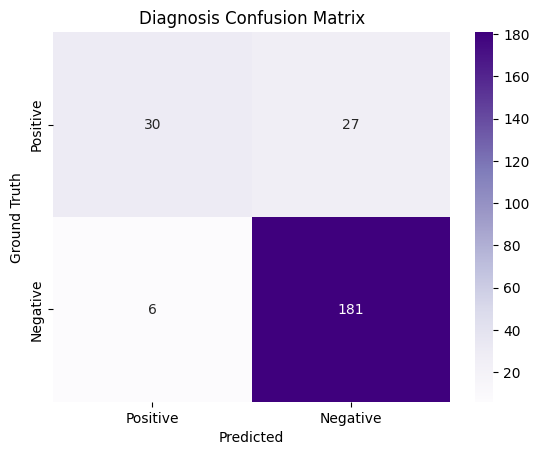

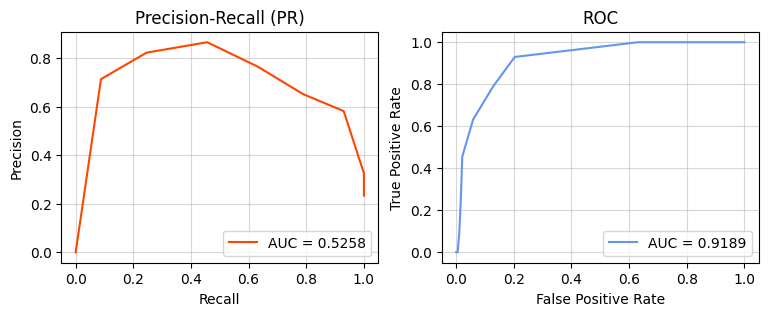

In [19]:
# SIN REBALANCEO
print("---------------------------------------------------------------")
print("SIN REBALANCEO")
print("---------------------------------------------------------------")
metricas_1_4 = evaluate_model_1_4(cell_diagnosis_dev_imbalanced_processed_and_standardized, metricas_1_4, method_name='Sin rebalanceo')

---------------------------------------------------------------
UNDERSAMPLING
---------------------------------------------------------------
ACCURACY             :  0.819672131147541
PRECISION            :  0.8666666666666667
RECALL               :  0.7878787878787878
FALSE POSITIVE RATE  :  0.14285714285714285
F-SCORE              :  0.8253968253968254
AUC-PR               :  0.5760370756111999
AUC-ROC              :  0.8943452380952381


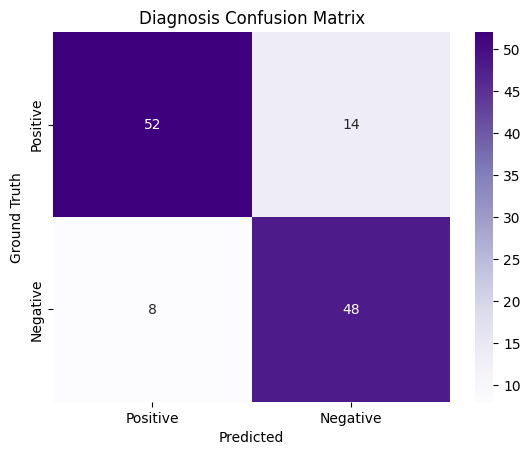

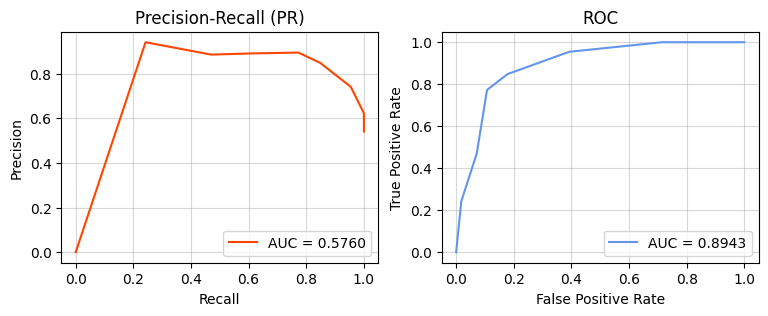

In [20]:
# UNDERSAMPLING 
print("---------------------------------------------------------------")
print("UNDERSAMPLING")
print("---------------------------------------------------------------")
cell_diagnosis_dev_undersampled : pd.DataFrame = prepro.undersample(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis')
metricas_1_4 = evaluate_model_1_4(cell_diagnosis_dev_undersampled, metricas_1_4, method_name='Undersampling')

---------------------------------------------------------------
OVERSAMPLING MEDIANTE DUPLICACIÓN
---------------------------------------------------------------
ACCURACY             :  0.8324873096446701
PRECISION            :  0.2826086956521739
RECALL               :  1.0
FALSE POSITIVE RATE  :  0.1793478260869565
F-SCORE              :  0.4406779661016949
AUC-PR               :  0.07543947959036618
AUC-ROC              :  0.9448160535117056


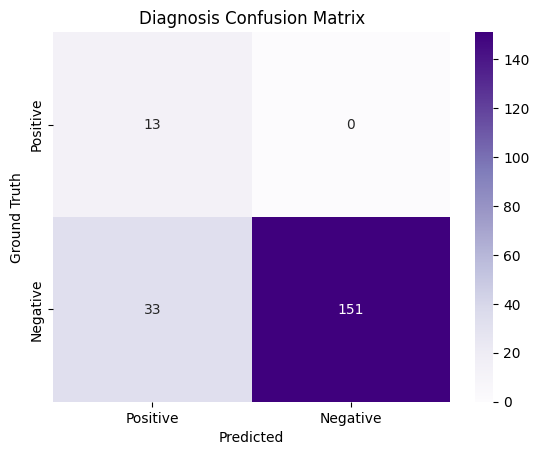

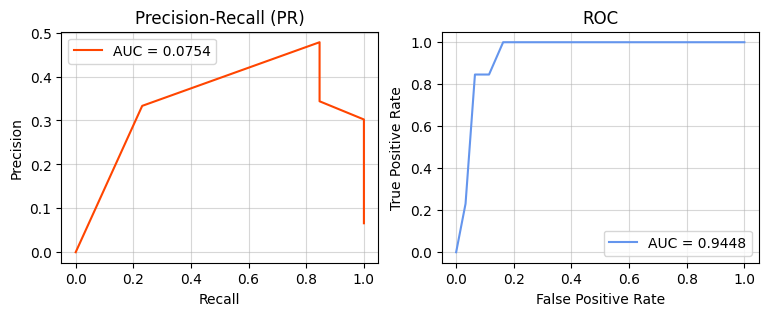

In [21]:
# OVERSAMPLING (DUPLICACIÓN) 
print("---------------------------------------------------------------")
print("OVERSAMPLING MEDIANTE DUPLICACIÓN")
print("---------------------------------------------------------------")
cell_diagnosis_dev_oversampled_by_duplication : pd.DataFrame = prepro.oversample_by_duplication(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis')
metricas_1_4 = evaluate_model_1_4(cell_diagnosis_dev_oversampled_by_duplication, metricas_1_4, method_name='Oversampling duplicate')


---------------------------------------------------------------
OVERSAMPLING MEDIANTE SMOTE
---------------------------------------------------------------
ACCURACY             :  0.7155963302752294
PRECISION            :  0.2
RECALL               :  0.7
FALSE POSITIVE RATE  :  0.2828282828282828
F-SCORE              :  0.3111111111111111
AUC-PR               :  0.12804405794015716
AUC-ROC              :  0.78989898989899


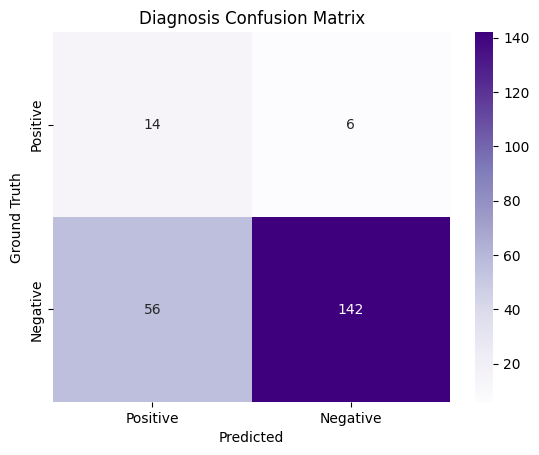

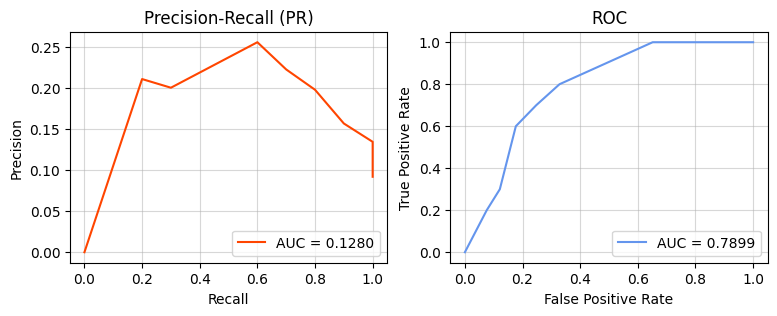

In [22]:
# OVERSAMPLING (SMOTE) 
print("---------------------------------------------------------------")
print("OVERSAMPLING MEDIANTE SMOTE")
print("---------------------------------------------------------------")
cell_diagnosis_dev_oversampled_by_SMOTE : pd.DataFrame = prepro.oversample_by_SMOTE(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis', k=2)
metricas_1_4 = evaluate_model_1_4(cell_diagnosis_dev_oversampled_by_SMOTE, metricas_1_4, method_name='Oversampling SMOTE')

---------------------------------------------------------------
COST RE-WEIGHTING
---------------------------------------------------------------
ACCURACY             :  0.860655737704918
PRECISION            :  0.6493506493506493
RECALL               :  0.8771929824561403
FALSE POSITIVE RATE  :  0.1443850267379679
F-SCORE              :  0.746268656716418
AUC-PR               :  0.3244547982068258
AUC-ROC              :  0.9290740219532789


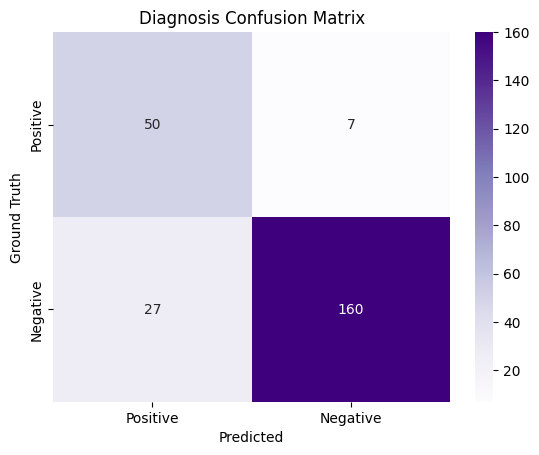

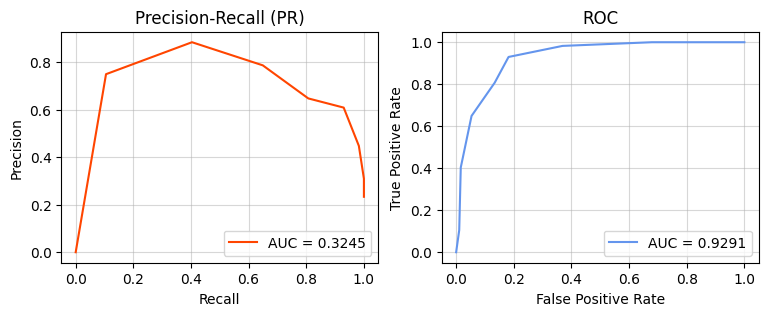

,MODELO,Accuracy,Precision,Recall,F-Score,AUC-ROC,AUC-PR
0,Cost re-weighting,0.860656,0.649351,0.877193,0.746269,0.324455,0.929074
1,Oversampling SMOTE,0.715596,0.200000,0.700000,0.311111,0.128044,0.789899
2,Oversampling duplicate,0.832487,0.282609,1.000000,0.440678,0.075439,0.944816
3,Undersampling,0.819672,0.866667,0.787879,0.825397,0.576037,0.894345
4,Sin rebalanceo,0.864754,0.833333,0.526316,0.645161,0.525820,0.918895


In [23]:
# OVERSAMPLING (DUPLICACIÓN) 
print("---------------------------------------------------------------")
print("COST RE-WEIGHTING")
print("---------------------------------------------------------------")
# cell_diagnosis_dev_oversampled_by_duplication : pd.DataFrame = prepro.cost_re_weight(cell_diagnosis_dev_imbalanced_processed_and_standardized, objective_class='Diagnosis')
# evaluate_model_1_4(cell_diagnosis_dev_oversampled_by_duplication)
train_1_4_reweighted : pd.DataFrame
validation_1_4_reweighted : pd.DataFrame
train_1_4_reweighted, validation_1_4_reweighted = data_handler.get_train_and_validation_sets(cell_diagnosis_dev_imbalanced_processed_and_standardized, train_fraction=0.8, seed=42)
log_reg_1_4_reweighted : LogisticRegression = LogisticRegression(train_1_4_reweighted.drop(columns=['Diagnosis']).to_numpy(), train_1_4_reweighted['Diagnosis'].to_numpy(), L2 = 9)
log_reg_1_4_reweighted.fit_gradient_descent_reweighted(
    int(cell_diagnosis_dev_imbalanced_processed_and_standardized['Diagnosis'].value_counts().idxmax()), 
    step_size=0.001, 
    tolerance=0.001, 
    max_number_of_steps=100000
)
log_reg_1_4_reweighted.predict(validation_1_4_reweighted.drop(columns=['Diagnosis']).to_numpy())
log_reg_1_4_reweighted.evaluate(validation_1_4_reweighted['Diagnosis'].to_numpy(), threshold = 0.5)
log_reg_1_4_reweighted.print_metrics()
recalls, precisions = log_reg_1_4_reweighted.get_roc_points(validation_1_4_reweighted['Diagnosis'].to_numpy(), k_points=10)
falses_positives_rateses, trues_positives_rateses = log_reg_1_4_reweighted.get_pr_points(validation_1_4_reweighted['Diagnosis'].to_numpy(), k_points=10)
print("AUC-PR               : ", utils.get_area_under_curve(recalls, precisions))
print("AUC-ROC              : ", utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses))
log_reg_1_4_reweighted.plot_confusion_matrix()
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Precision-Recall (PR)")
plt.plot(recalls, precisions, color='orangered', label=f'AUC = {utils.get_area_under_curve(recalls, precisions):.4f}')
plt.grid(visible=True, alpha=0.5)
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.subplot(1, 2, 2)
plt.title("ROC")
plt.plot(falses_positives_rateses, trues_positives_rateses, color='cornflowerblue', label=f'AUC = {utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses):.4f}')
plt.grid(visible=True, alpha=0.5)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
metricas_1_4.loc[-1] = [
    'Cost re-weighting',
    log_reg_1_4_reweighted.get_accuracy(),
    log_reg_1_4_reweighted.get_precision(),
    log_reg_1_4_reweighted.get_recall(),
    log_reg_1_4_reweighted.get_f_score(),
    utils.get_area_under_curve(recalls, precisions),
    utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses)
]
metricas_1_4.index = metricas_1_4.index + 1
metricas_1_4 = metricas_1_4.iloc[::-1].sort_index()
metricas_1_4.head()

## 1.5 )

In [24]:
def evaluate_model_1_5(df_train : pd.DataFrame, df_evaluation, metricas : pd.DataFrame, method_name : str = "") -> pd.DataFrame:
    train_1_5 : pd.DataFrame
    validation_1_5 : pd.DataFrame
    _df_train : pd.DataFrame = df_train.copy()
    _df_evaluation : pd.DataFrame = df_evaluation.copy()
    train_1_5, validation_1_5 = data_handler.get_train_and_validation_sets(_df_train, train_fraction=0.8, seed=42)
    log_reg_1_5 : LogisticRegression = LogisticRegression(train_1_5.drop(columns=['Diagnosis']).to_numpy(), train_1_5['Diagnosis'].to_numpy(), L2 = 9)
    log_reg_1_5.fit_gradient_descent(step_size=0.001, tolerance=0.001, max_number_of_steps=100000)
    log_reg_1_5.predict(_df_evaluation.drop(columns=['Diagnosis']).to_numpy())
    log_reg_1_5.evaluate(_df_evaluation['Diagnosis'].to_numpy(), threshold = 0.5)
    log_reg_1_5.print_metrics()
    recalls, precisions = log_reg_1_5.get_roc_points(_df_evaluation['Diagnosis'].to_numpy(), k_points=10)
    falses_positives_rateses, trues_positives_rateses = log_reg_1_5.get_pr_points(_df_evaluation['Diagnosis'].to_numpy(), k_points=10)
    print("AUC-PR               : ", utils.get_area_under_curve(recalls, precisions))
    print("AUC-ROC              : ", utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses))
    log_reg_1_5.plot_confusion_matrix()
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 2, 1)
    plt.title("Precision-Recall (PR)")
    plt.plot(recalls, precisions, color='orangered', label=f'AUC = {utils.get_area_under_curve(recalls, precisions):.4f}')
    plt.grid(visible=True, alpha=0.5)
    plt.legend()
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.subplot(1, 2, 2)
    plt.title("ROC")
    plt.plot(falses_positives_rateses, trues_positives_rateses, color='cornflowerblue', label=f'AUC = {utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses):.4f}')
    plt.grid(visible=True, alpha=0.5)
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    if method_name:
        metricas.loc[-1] = [
            method_name,
            log_reg_1_5.get_accuracy(),
            log_reg_1_5.get_precision(),
            log_reg_1_5.get_recall(),
            log_reg_1_5.get_f_score(),
            utils.get_area_under_curve(recalls, precisions),
            utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses)
        ]
        metricas.index = metricas.index + 1
        metricas = metricas.sort_index()
    return metricas

In [25]:
# Realizo el rebalanceo con el dataset preprocesado
cell_diagnosis_test_imbalanced_processed_and_standardized : pd.DataFrame = prepro.process_and_stardardize(
    cell_diagnosis_test_imbalanced, 
    filename='cell_diagnosis_test_imbalanced', 
    save_path=f'{project_root}/TP02/problema1/data/processed/'
)
metricas_1_5 : pd.DataFrame = pd.DataFrame(columns=['MODELO', 'Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC-ROC', 'AUC-PR'])
metricas_1_5.head()

,MODELO,Accuracy,Precision,Recall,F-Score,AUC-ROC,AUC-PR


---------------------------------------------------------------
SIN REBALANCEO
---------------------------------------------------------------
ACCURACY             :  0.8676470588235294
PRECISION            :  0.8636363636363636
RECALL               :  0.5588235294117647
FALSE POSITIVE RATE  :  0.029411764705882353
F-SCORE              :  0.6785714285714286
AUC-PR               :  0.6906849638251022
AUC-ROC              :  0.9395905420991928


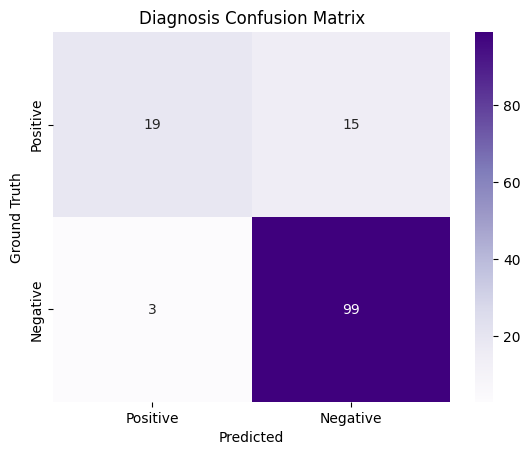

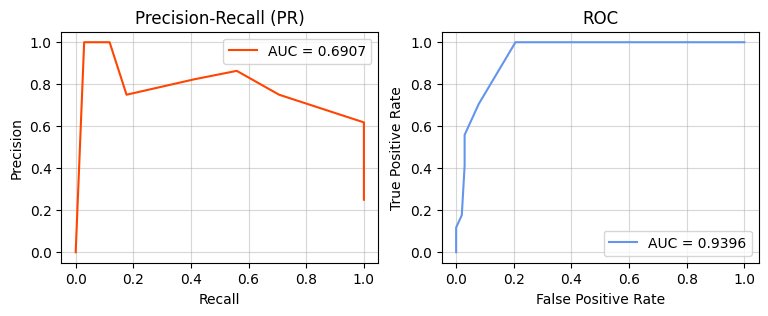

In [26]:
# SIN REBALANCEO
print("---------------------------------------------------------------")
print("SIN REBALANCEO")
print("---------------------------------------------------------------")
metricas_1_5 = evaluate_model_1_5(
    df_train=cell_diagnosis_dev_imbalanced_processed_and_standardized,          # Utilizo el mismo dataset para entrenamiento
    df_evaluation=cell_diagnosis_test_imbalanced_processed_and_standardized,
    metricas=metricas_1_5,
    method_name='Sin rebalanceo'
)

---------------------------------------------------------------
UNDERSAMPLING
---------------------------------------------------------------
ACCURACY             :  0.7794117647058824
PRECISION            :  1.0
RECALL               :  0.5588235294117647
FALSE POSITIVE RATE  :  0.0
F-SCORE              :  0.7169811320754716
AUC-PR               :  0.8783763884498267
AUC-ROC              :  0.9502595155709344


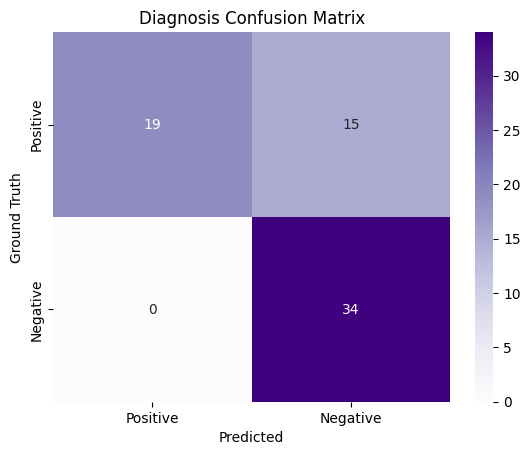

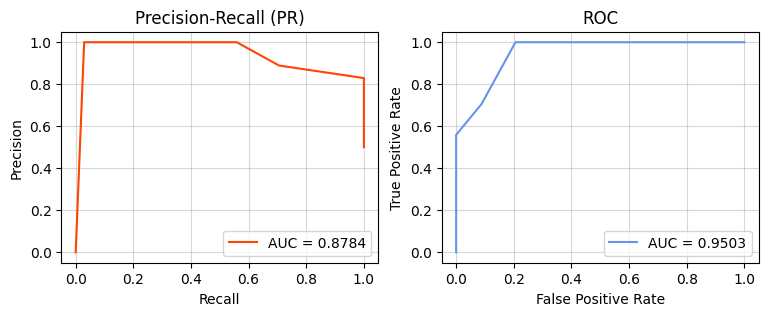

In [27]:
# UNDERSAMPLING 
print("---------------------------------------------------------------")
print("UNDERSAMPLING")
print("---------------------------------------------------------------")
cell_diagnosis_test_undersampled : pd.DataFrame = prepro.undersample(cell_diagnosis_test_imbalanced_processed_and_standardized, objective_class='Diagnosis')
metricas_1_5 = evaluate_model_1_5(
    df_train=cell_diagnosis_dev_imbalanced_processed_and_standardized,          # Utilizo el mismo dataset para entrenamiento
    df_evaluation=cell_diagnosis_test_undersampled,
    metricas=metricas_1_5,
    method_name='Sin rebalanceo'
)

---------------------------------------------------------------
OVERSAMPLING MEDIANTE DUPLICACIÓN
---------------------------------------------------------------
ACCURACY             :  0.7843137254901961
PRECISION            :  0.953125
RECALL               :  0.5980392156862745
FALSE POSITIVE RATE  :  0.029411764705882353
F-SCORE              :  0.7349397590361446
AUC-PR               :  0.854049058164412
AUC-ROC              :  0.9435313341022684


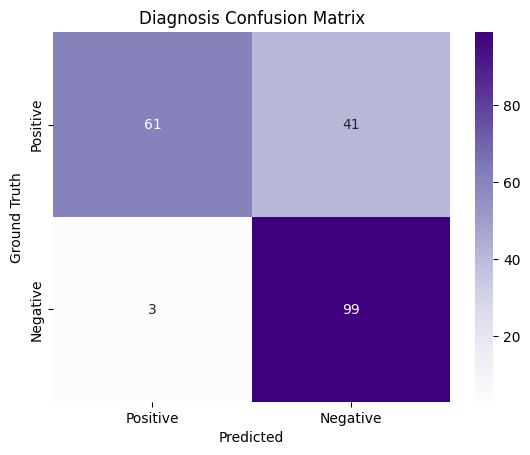

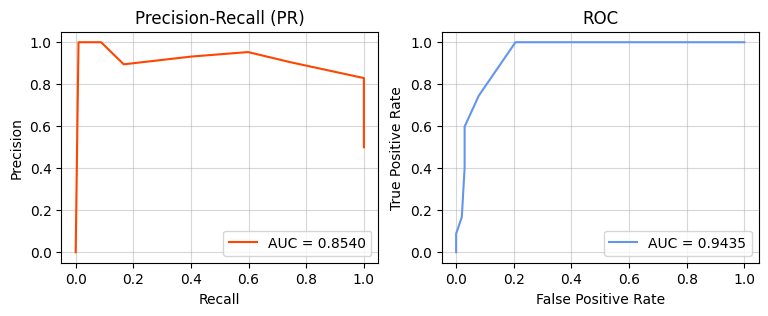

In [28]:
# OVERSAMPLING (DUPLICACIÓN) 
print("---------------------------------------------------------------")
print("OVERSAMPLING MEDIANTE DUPLICACIÓN")
print("---------------------------------------------------------------")
cell_diagnosis_test_undersampled : pd.DataFrame = prepro.oversample_by_duplication(cell_diagnosis_test_imbalanced_processed_and_standardized, objective_class='Diagnosis')
metricas_1_5 = evaluate_model_1_5(
    df_train=cell_diagnosis_dev_imbalanced_processed_and_standardized,          # Utilizo el mismo dataset para entrenamiento
    df_evaluation=cell_diagnosis_test_undersampled,
    metricas=metricas_1_5,
    method_name='Oversampling duplicate'
)

---------------------------------------------------------------
OVERSAMPLING MEDIANTE SMOTE
---------------------------------------------------------------
ACCURACY             :  0.6134453781512605
PRECISION            :  0.94
RECALL               :  0.34558823529411764
FALSE POSITIVE RATE  :  0.029411764705882353
F-SCORE              :  0.5053763440860215
AUC-PR               :  0.8856573350568036
AUC-ROC              :  0.8939230103806228


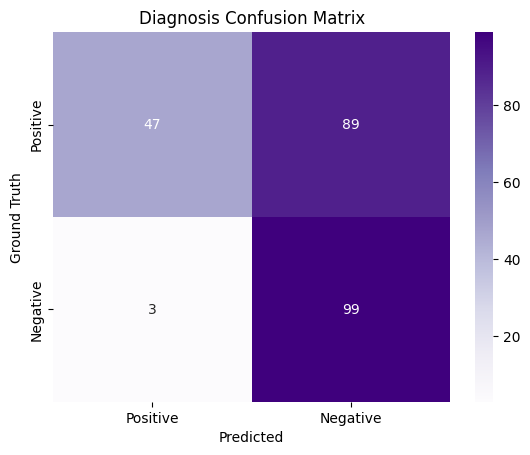

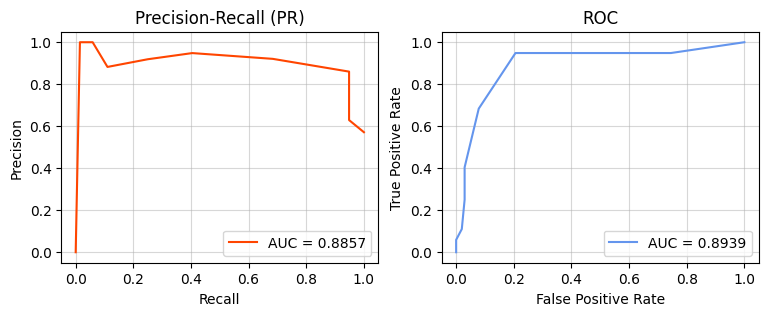

In [29]:
# OVERSAMPLING (SMOTE) 
print("---------------------------------------------------------------")
print("OVERSAMPLING MEDIANTE SMOTE")
print("---------------------------------------------------------------")
cell_diagnosis_test_undersampled : pd.DataFrame = prepro.oversample_by_SMOTE(cell_diagnosis_test_imbalanced_processed_and_standardized, objective_class='Diagnosis', k=2)
metricas_1_5 = evaluate_model_1_5(
    df_train=cell_diagnosis_dev_imbalanced_processed_and_standardized,          # Utilizo el mismo dataset para entrenamiento
    df_evaluation=cell_diagnosis_test_undersampled,
    metricas=metricas_1_5,
    method_name='Oversampling SMOTE'
)

---------------------------------------------------------------
COST RE-WEIGHTING
---------------------------------------------------------------
ACCURACY             :  0.9044117647058824
PRECISION            :  0.7333333333333333
RECALL               :  0.9705882352941176
FALSE POSITIVE RATE  :  0.11764705882352941
F-SCORE              :  0.8354430379746836
AUC-PR               :  0.32834197771537926
AUC-ROC              :  0.9532871972318339


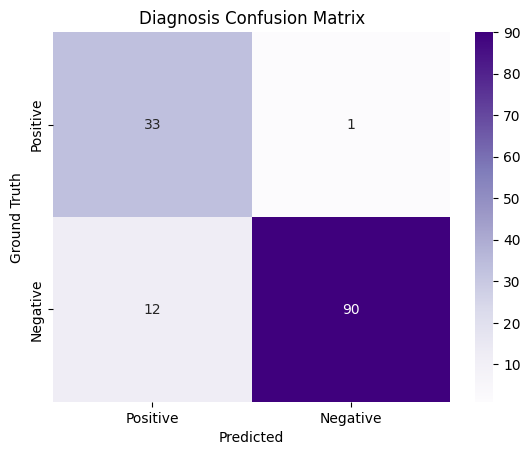

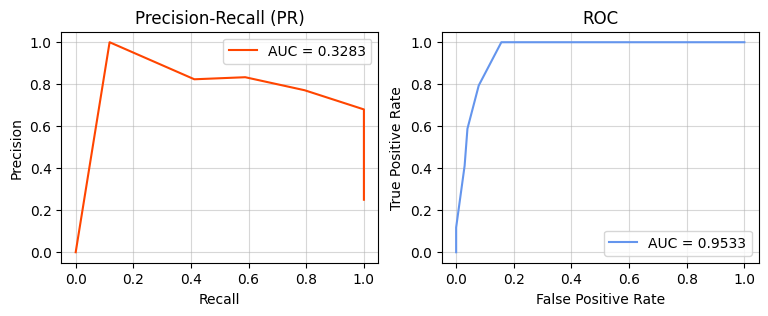

,MODELO,Accuracy,Precision,Recall,F-Score,AUC-ROC,AUC-PR
0,Cost re-weighting,0.904412,0.733333,0.970588,0.835443,0.328342,0.953287
1,Cost re-weighting,0.860656,0.649351,0.877193,0.746269,0.324455,0.929074
2,Oversampling SMOTE,0.715596,0.200000,0.700000,0.311111,0.128044,0.789899
3,Oversampling duplicate,0.832487,0.282609,1.000000,0.440678,0.075439,0.944816
4,Undersampling,0.819672,0.866667,0.787879,0.825397,0.576037,0.894345


In [30]:
# OVERSAMPLING (DUPLICACIÓN) 
print("---------------------------------------------------------------")
print("COST RE-WEIGHTING")
print("---------------------------------------------------------------")
# Uso el modelo entrenado en el punto 1.4)
log_reg_1_4_reweighted.predict(cell_diagnosis_test_imbalanced_processed_and_standardized.drop(columns=['Diagnosis']).to_numpy())
log_reg_1_4_reweighted.evaluate(cell_diagnosis_test_imbalanced_processed_and_standardized['Diagnosis'].to_numpy(), threshold = 0.5)
log_reg_1_4_reweighted.print_metrics()
recalls, precisions = log_reg_1_4_reweighted.get_roc_points(cell_diagnosis_test_imbalanced_processed_and_standardized['Diagnosis'].to_numpy(), k_points=10)
falses_positives_rateses, trues_positives_rateses = log_reg_1_4_reweighted.get_pr_points(cell_diagnosis_test_imbalanced_processed_and_standardized['Diagnosis'].to_numpy(), k_points=10)
print("AUC-PR               : ", utils.get_area_under_curve(recalls, precisions))
print("AUC-ROC              : ", utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses))
log_reg_1_4_reweighted.plot_confusion_matrix()
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Precision-Recall (PR)")
plt.grid(visible=True, alpha=0.5)
plt.plot(recalls, precisions, color='orangered', label=f'AUC = {utils.get_area_under_curve(recalls, precisions):.4f}')
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.subplot(1, 2, 2)
plt.title("ROC")
plt.grid(visible=True, alpha=0.5)
plt.plot(falses_positives_rateses, trues_positives_rateses, color='cornflowerblue', label=f'AUC = {utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses):.4f}')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
metricas_1_4.loc[-1] = [
    'Cost re-weighting',
    log_reg_1_4_reweighted.get_accuracy(),
    log_reg_1_4_reweighted.get_precision(),
    log_reg_1_4_reweighted.get_recall(),
    log_reg_1_4_reweighted.get_f_score(),
    utils.get_area_under_curve(recalls, precisions),
    utils.get_area_under_curve(falses_positives_rateses, trues_positives_rateses)
]
metricas_1_4.index = metricas_1_4.index + 1
metricas_1_4 = metricas_1_4.iloc[::-1].sort_index()
metricas_1_4.head()